In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

In [5]:
train = pd.read_csv('rosbank_train.csv')
test = pd.read_csv('rosbank_test.csv')
mcc = pd.read_excel('mcc_codes.xlsx', names = ['MCC','MCC_Name','MCC_Group'])


array([5200, 6011, 5921, 5411, 6012, 5814, 4111, 5812, 5661, 7996, 5947,
       5691, 5813, 7991, 7399, 4468, 5999, 5811, 5912, 5942, 9311, 5977,
       7832, 5499, 5651, 5944, 5621, 4112, 5735, 5995, 5331, 7230, 7922,
       4131, 4814, 8011, 5722, 4722, 5941, 4511, 5641, 7011, 9222, 5211,
       7299, 5993, 5533, 5655, 5983, 5992, 5541, 7531, 4829, 5251, 8999,
       5311, 5732, 8099, 5699, 5943, 4812, 5712, 7542, 8062, 5714, 5611,
       5462, 5451, 7997, 4011, 8071, 7512, 5261, 5719, 9399, 4784, 5631,
       7278, 7311, 9211, 7298, 6300, 4900, 5964, 5192, 5945, 5111, 5441,
       8043, 6051, 7538, 7032, 7523, 5399, 3011, 7216, 5946, 7221, 5300,
       8299, 4816, 4121, 8021, 6010, 4789, 7941, 5193, 5949, 7375, 7933,
       3010, 5950, 4215, 4214,  780, 7699, 5970, 5734, 5948, 7395, 5309,
       3703, 5994, 4411, 7999, 5511, 5131, 4899, 7392, 9402, 3381, 8398,
       5713, 5422, 5733,  742, 3355, 5199, 5310, 3260, 3058, 3628, 3824,
       3057, 3607, 3515, 3387, 7995, 7629, 7998, 62

In [ ]:
y_train = train.target_flag.copy()
train.drop (columns= ['target_flag','target_sum'],axis=1, inplace= True)

In [ ]:
train['IsTrain'] = 1
test['IsTrain'] = 0
train_test = pd.concat( [train, test], axis = 0 )

In [121]:
# Creating separate cols for yr, month,...
train_test_mcc['Year'] = train_test_mcc.TRDATETIME.str[5:7]
train_test_mcc['Month'] = train_test_mcc.TRDATETIME.str[2:5]
train_test_mcc['Date'] = train_test_mcc.TRDATETIME.str[0:2]
train_test_mcc['Hour'] = train_test_mcc.TRDATETIME.str[8:10]
# Replace month with ints
train_test_mcc.Month = train_test_mcc.Month.replace(to_replace=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
                                                'JUL','AUG','SEP','OCT','NOV','DEC' ], 
                                    value=[1,2,3,4,5,6,7,8,9,10,11,12])
# Convert to ints (add 2000 to yr)
train_test_mcc.Year = train_test_mcc.Year.astype(int, copy= True)
train_test_mcc.Date = train_test_mcc.Date.astype(int, copy= True)
train_test_mcc.Hour = train_test_mcc.Hour.astype(int, copy= True)
train_test_mcc.Year = train_test_mcc.Year + 2000
# Add function to convert to DateTime and apply it
train_test_mcc['DateTimeFormated'] = train_test_mcc['Year'].astype(str)+'-'+train_test_mcc['Month'].astype(str)
train_test_mcc['DateTimeFormated']= pd.to_datetime(train_test_mcc['DateTimeFormated']+ '-'+train_test_mcc['Date'].astype(str)+ ' '+train_test_mcc['Hour'].astype(str)+ ':00:00')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BFCF87FB38>,
      dtype=object)

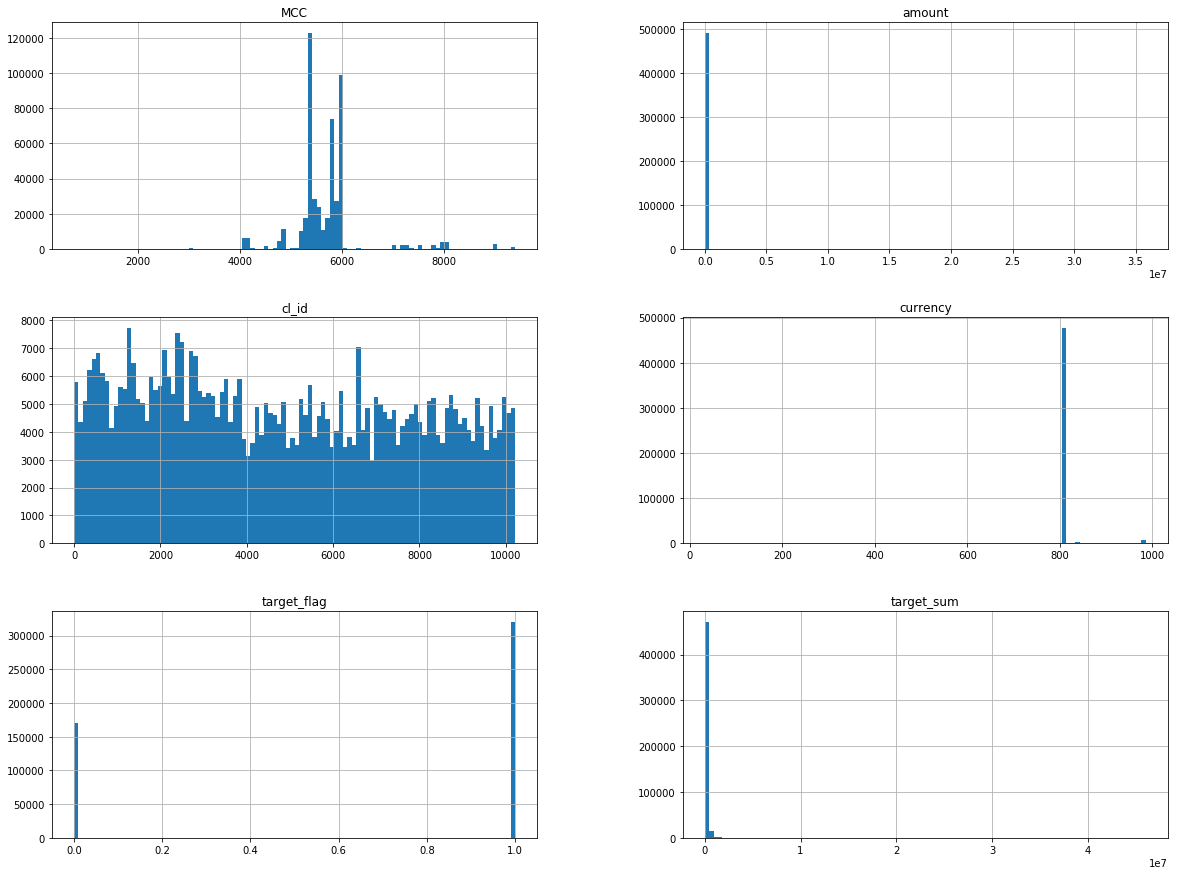

In [27]:
train.hist(bins=100, figsize=(20,15))

In [10]:
print("Total clients: ", len(raw_df.cl_id.unique()))

Total clients:  5000


Всего 5000 клиентов, случайным образом возьмем 1000 клиентов для тестирования

In [35]:
cl_ids_test = np.random.choice(raw_df.cl_id.unique(), size=1000, replace=False)
cl_ids_test_set = set(cl_ids_test)

In [40]:
# create transactions dataset for train
transactions_train = raw_df[~raw_df.cl_id.isin(cl_ids_test)].copy()
print("Total transactions in train dataset: ", len(transactions_train))
# create transactions dataset for test
transactions_test = raw_df[raw_df.cl_id.isin(cl_ids_test)].copy()
print("Total transactions in test dataset: ", len(transactions_test))

Total transactions in train dataset:  388031
Total transactions in test dataset:  102482


## Домашняя работа

1. Наборы данных вида Transactions (несколько транзакций на одного клиента) трансформировать в таблицу, где cl_id будут уникальными (соответственно 4000 строк в train и 1000 строк в test
2. Для каждого cl_id будет уникальное целевое событие target_flag, а также уникальный канал привлечения клиента channel_type (клиент привлекается лишь однажды и с самого начала его записи присваивается значение канала привлечения)
3. При агрегации (*pandas.DataFrame.groupby*) по cl_id (или по связке cl_id, channel_type, target_flag) необходимо создавать производные фичи, идеи для таких фичей могут быть следующими:

    - общая сумма транзакций по каждой из trx_category
    - общая сумма транзакции по основным вылютам (напр. выделить рубли, доллары и евро - предположительно, это будут самые крупные категории)
    - общая сумма транзакций по категориям MCC кодов (например, выбрать основные/популярные MCC коды). ВНИМАНИ! Некоторые MCC коды из train могут быть не представлены в test. Про MCC коды в целом: http://www.banki.ru/wikibank/mcc-kod/; Справочник MCC кодов: https://mcc-codes.ru/code; Про некоторые категории кэшбека Росбанка: https://mcc-codes.ru/card/rosbank-sverkh-plus;
    - возможные агрегации по времени суток и дням недели - траты в выходные (праздники) или будни, в ночное время или в рабочее и т.д.
3. **Обязательная часть**: провести первичный анализ данных - посмотреть распределения признаков, выделить самые популярные MCC, помотреть активность клиентов по дням недели/времени, какие категории транзакции (trx_category) наиболее популярны и т.д. Получить инсайты, которые в дальнейшем помогут вам правильно подготовить фичи
4. **Обязательная часть**: на большом количестве фичей применить Lasso регрессию и посмотреть, какие переменные получают 0 в качестве коэффициентов
5. **Обязательная часть**: на фичах из MCC кодов применить PCA и посмотреть, какие фичи получаются и что они могут объяснять (для этого посмотреть на коэффициенты в *sklearn.decomposition.pca.components_* после построения главных компонент)
6. **Обязательная часть**: с отобранными фичами и полученными компонентами обучить модель (тип алгоритма на свой вкус, можно начать с линейной) и померить качество на локальном тестовом наборе данных (локальная валидация), который создается в этом ноутбуке. Сравнить качество модели до добавления компонент/после добавления/только на главных компонентах. **Метрика оценки качества - ROC AUC**(https://en.wikipedia.org/wiki/Receiver_operating_characteristic)
8. **Дополнительная часть**: поучаствовать в соревновании - загрузить предсказания на https://boosters.pro/champ_15. Для этого необходимо использовать все данные из файла rosbank_train.csv, на них делать feature engineering и обучениеб затем делать предсказания для клиентов из файла rosbank_test.csv, предварительно создав фичи по аналогии с train.
9. Задания принимаются в виде ноутбука с кодом/картинками выполненной обязательной части + указанием места в leaderboard при решении дополнительной

При возникновении вопросов и для отправки домашнего задания - egsachko@gmail.com или http://fb.com/sachkoe
    